In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib .pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
import soundfile as sf
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D,LSTM
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from sklearn import svm



import tensorflow as tf
print("Tensorflow version:", tf.__version__)


2023-03-11 22:23:19.465732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version: 2.10.0


In [2]:
paths = []
labels = []

for dirname, _, filenames in os.walk('Hbd/Dataset-1/Dataset/'):
    
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        labels.append(filename.replace(filename,dirname))
        
         

In [3]:
labels[:5]

['Hbd/Dataset-1/Dataset/happy',
 'Hbd/Dataset-1/Dataset/happy',
 'Hbd/Dataset-1/Dataset/happy',
 'Hbd/Dataset-1/Dataset/happy',
 'Hbd/Dataset-1/Dataset/happy']

In [4]:
mainlabels = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/anger', 'Angry'), labels))
mainlabels1 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/disgust', 'Disgust'), mainlabels))
mainlabels2 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/fear', 'Fear'), mainlabels1))
mainlabels3 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/happy', 'Happy'), mainlabels2))
mainlabels4 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/neutral', 'Neutral'), mainlabels3))
mainlabels5 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/sad', 'Sad'), mainlabels4))
mainlabels6 = list(map(lambda x: x.replace('Hbd/Dataset-1/Dataset/surprise', 'Surprise'), mainlabels5))

print(mainlabels6)

['Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 

In [5]:
df = pd.DataFrame()
df['speech']=paths
df['label']=mainlabels6
df.head(5)
# print(df['label'])


speech  label
0  Hbd/Dataset-1/Dataset/happy/happy222.wav  Happy
1  Hbd/Dataset-1/Dataset/happy/happy236.wav  Happy
2  Hbd/Dataset-1/Dataset/happy/happy008.wav  Happy
3  Hbd/Dataset-1/Dataset/happy/happy020.wav  Happy
4  Hbd/Dataset-1/Dataset/happy/happy034.wav  Happy

In [6]:
a=df['label'].value_counts()
a



Happy       436
Sad         436
Fear        436
Angry       436
Neutral     308
Surprise    252
Disgust     252
Name: label, dtype: int64

In [7]:
data = [["Neutral",308],["Angry",436],["Sad",436],["Fear",436],["Happy",436],["Surprise",252],["Disgust",252]]
df1=pd.DataFrame(data,columns=['Emotions','Valuecount'])
df1

Emotions  Valuecount
0   Neutral         308
1     Angry         436
2       Sad         436
3      Fear         436
4     Happy         436
5  Surprise         252
6   Disgust         252

In [8]:
df['speech'].value_counts().sum()

2556

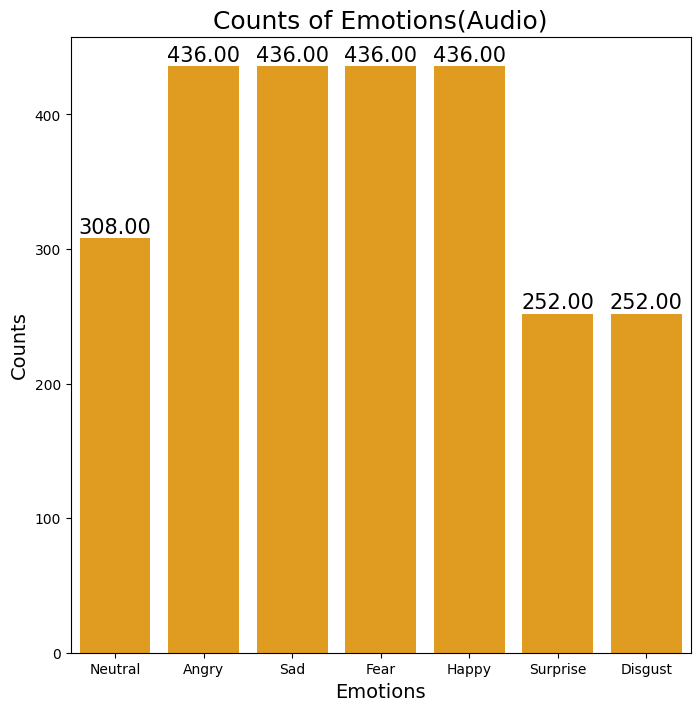

In [9]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Emotions", y="Valuecount", data=df1,color='orange')
for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.xlabel("Emotions", size=14)
 
# Setting the label for y-axis
plt.ylabel("Counts", size=14)
 
# Setting the title for the graph
plt.title("Counts of Emotions(Audio)",size=18)
plt.grid(False)
 
# Finally showing the plot
plt.show()        


In [10]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    


In [11]:
from IPython.display import Audio

In [12]:
# data,sampling_rate = librosa.load(path)
# sampling_rate

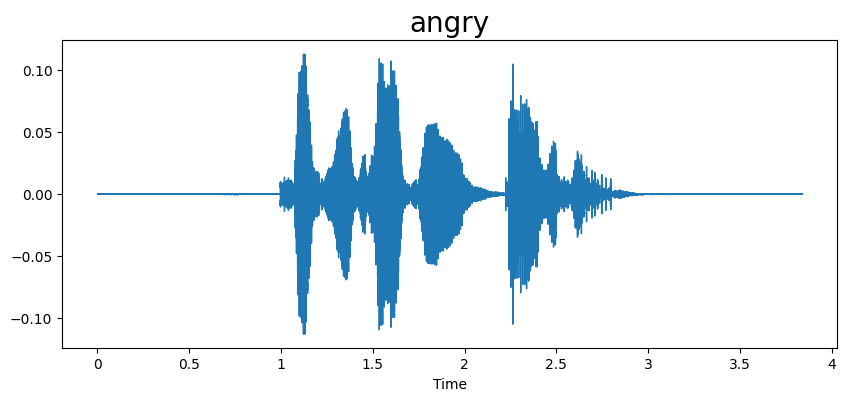

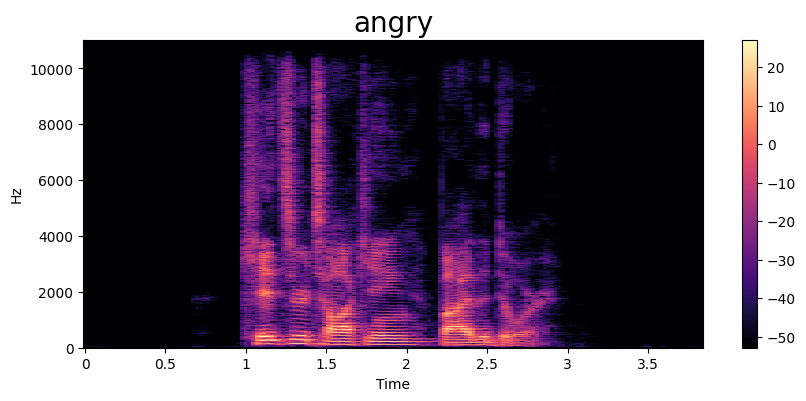

In [13]:
#we can also disply waveplot and specsplot for all the classes  

emotion='angry'
path=df.iat[30,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


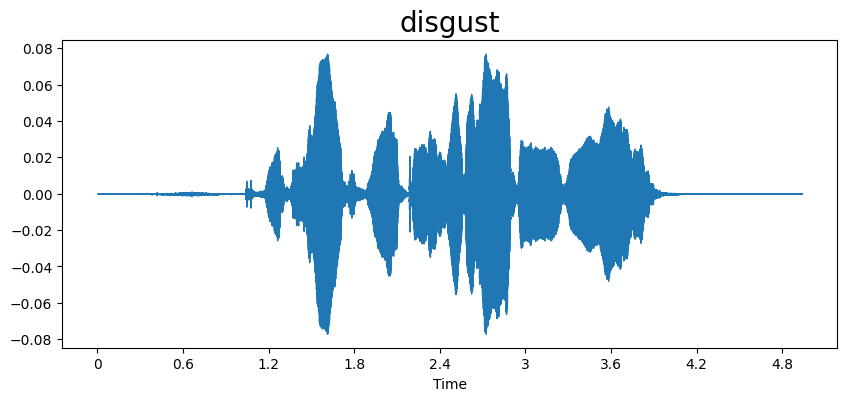

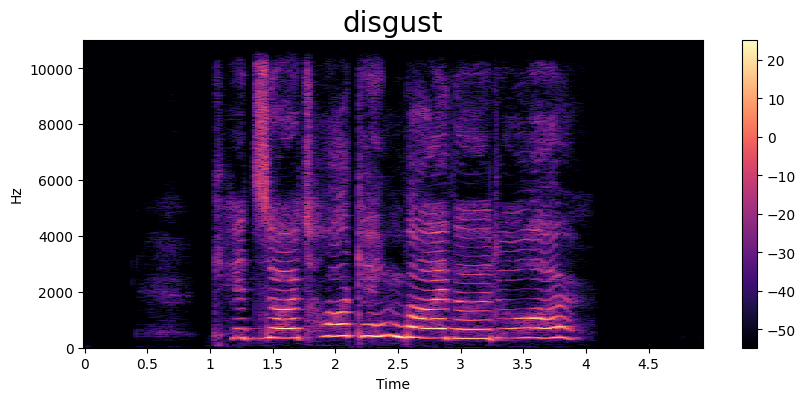

In [14]:
emotion='disgust'
path=df.iat[819,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


# Augmentation

In [15]:
#adding background noise
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    augmented_data = signal + noise_factor * noise
    # Cast back to same data type
    return augmented_data


In [16]:
if __name__ =="__main__":
    signal,sr = librosa.load(df['speech'][30])
    augmented_signal = add_white_noise(signal,0.5)
    sf.write("augg1.wav",augmented_signal,sr)
   

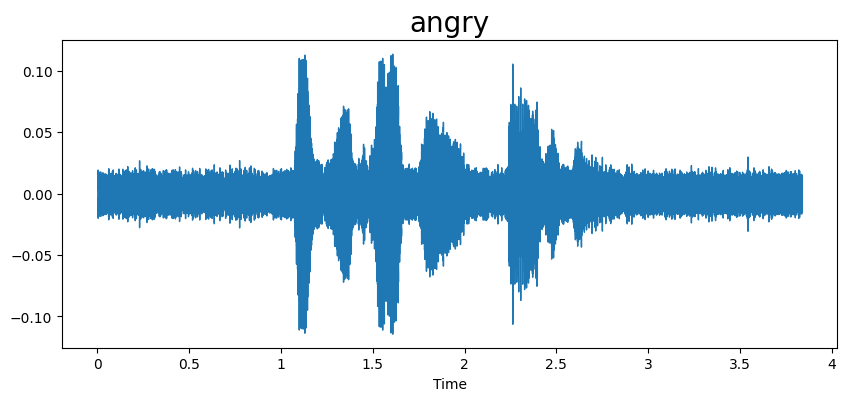

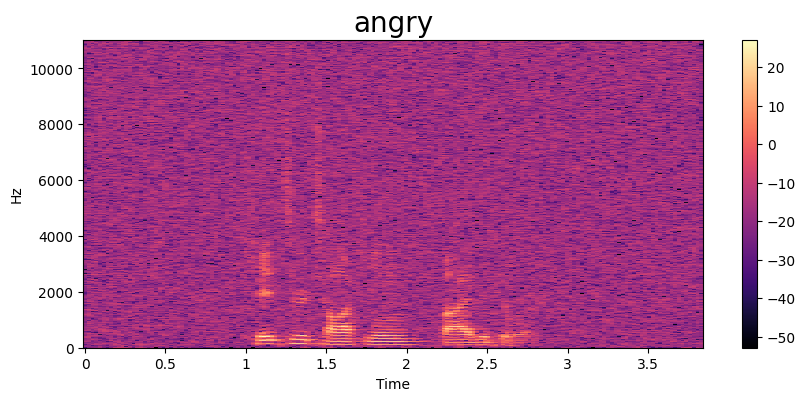

In [17]:
emotion='angry'
data,sampling_rate = librosa.load("augg1.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg1.wav")

In [18]:
#time scaling
def time_stretch(df,stretch_rate):
    return librosa.effects.time_stretch(df,stretch_rate)


In [19]:
if __name__ =="__main__":
    df,sr = librosa.load(df['speech'][30])
    augmented_signal = time_stretch(df,0.5)
    sf.write("augg2.wav",augmented_signal,sr)
   

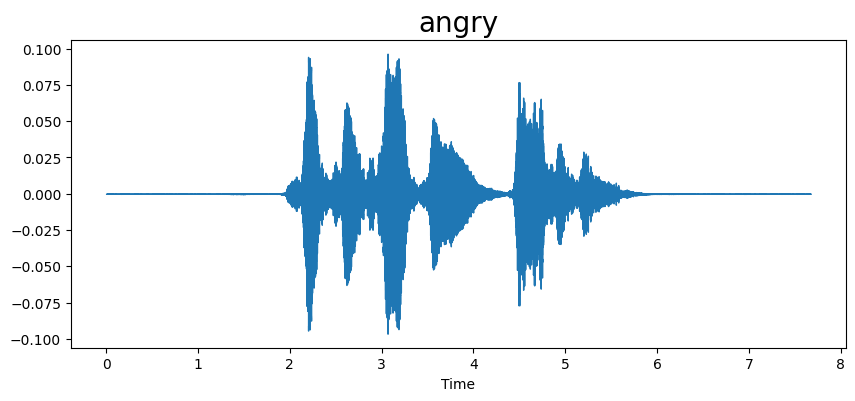

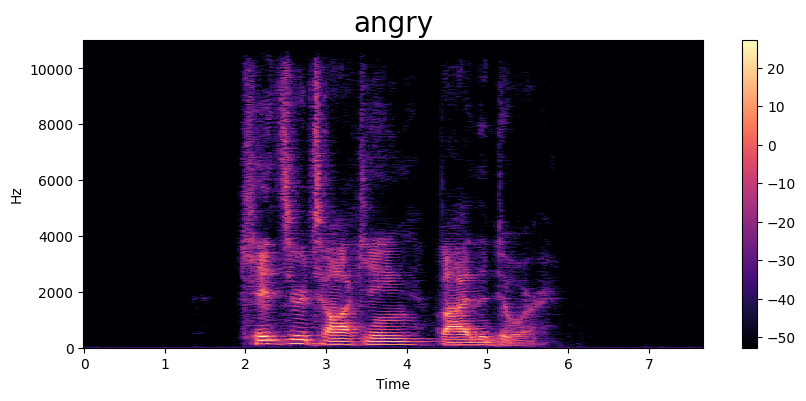

In [20]:
emotion='angry'
data,sampling_rate = librosa.load("augg2.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg2.wav")

In [21]:
#pitch scaling
def pitch_scale(signal,sr,num_semitones):
    return librosa.effects.pitch_shift(signal,sr,num_semitones)

In [22]:
if __name__ =="__main__":
    df,sr = librosa.load('Hbd/demo_audio.wav')
    augmented_signal = pitch_scale(df,sr,12)
    sf.write("augg3.wav",augmented_signal,sr)

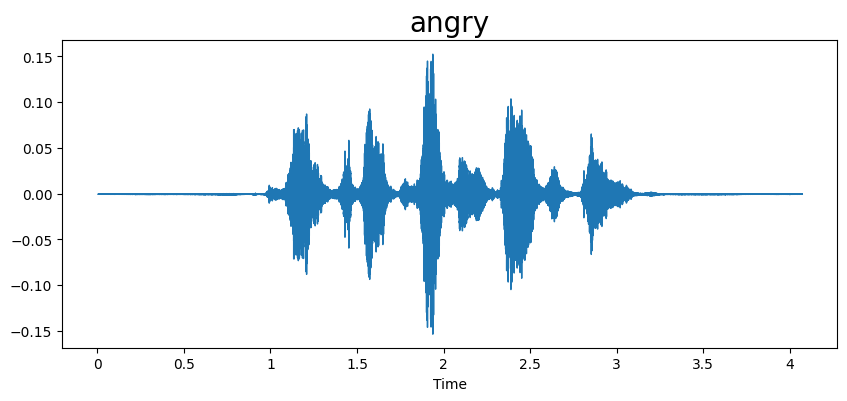

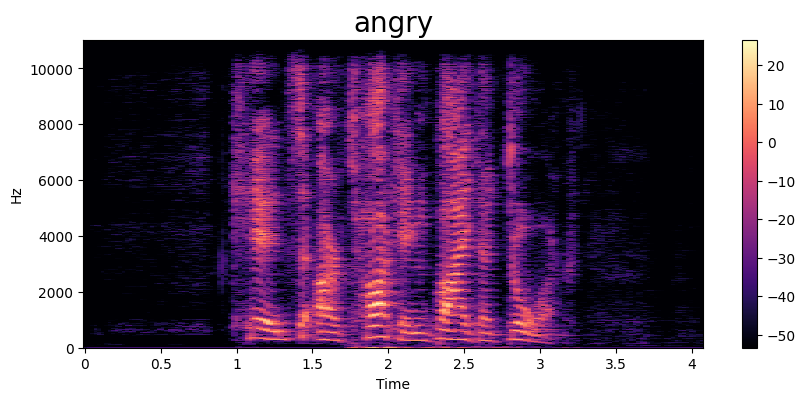

In [23]:
emotion='angry'
data,sampling_rate = librosa.load("augg3.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg3.wav")


In [24]:
#Random gain scaling
import random
def randomg_gain(df,min_gain_factor,max_gain_factor):
    gain_factor = random.uniform(min_gain_factor,max_gain_factor)
    return df * gain_factor

In [25]:
if __name__ =="__main__":
    df,sr = librosa.load('Hbd/demo_audio.wav')
    augmented_signal = randomg_gain(df,2,6)
    sf.write("augg4.wav",augmented_signal,sr)

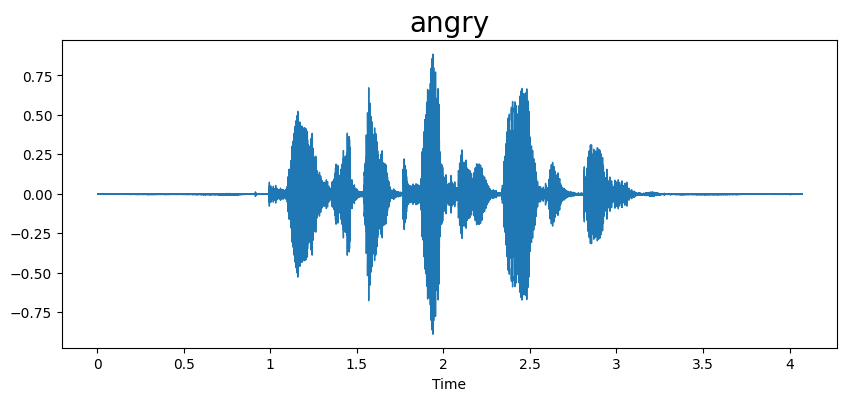

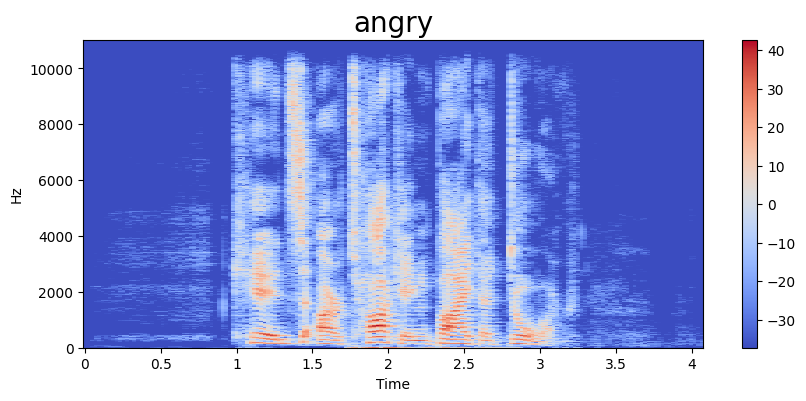

In [41]:
data,sampling_rate = librosa.load("augg4.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg4.wav")


# Feature Extraction

In [27]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5,res_type='kaiser_fast')
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [28]:
df = pd.DataFrame()
df['speech']=paths
df['label']=mainlabels6
df.head(5)
# print(df['label'])

speech  label
0  Hbd/Dataset-1/Dataset/happy/happy222.wav  Happy
1  Hbd/Dataset-1/Dataset/happy/happy236.wav  Happy
2  Hbd/Dataset-1/Dataset/happy/happy008.wav  Happy
3  Hbd/Dataset-1/Dataset/happy/happy020.wav  Happy
4  Hbd/Dataset-1/Dataset/happy/happy034.wav  Happy

In [29]:
extract_mfcc(df['speech'][0])

array([-5.5223969e+02,  8.5486862e+01, -3.2736374e+01,  2.7850273e+01,
       -2.8950312e+00, -1.8566360e+01, -1.8654566e+01, -9.0829058e+00,
       -1.3602783e+01, -1.1951412e+00, -1.3245120e+01, -4.4385646e-02,
       -9.6074858e+00, -9.3849535e+00, -5.9822822e+00, -3.3244395e+00,
       -1.4664541e+01,  5.4488522e-01, -1.1023859e+01, -7.3595786e+00,
       -9.9623489e+00, -3.8825922e+00, -9.7668047e+00, -3.3176773e+00,
       -4.5776019e+00, -8.2762271e-01, -7.3844156e+00, -3.4371152e+00,
       -4.9772735e+00,  1.2134073e+00,  6.7668519e+00,  8.6489153e+00,
        2.4894729e+00, -2.6757915e+00, -5.2694225e+00, -3.6270230e+00,
        7.5553741e+00,  1.7111013e+01,  2.1949017e+01,  1.7582169e+01],
      dtype=float32)

In [30]:
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-552.2397, 85.48686, -32.736374, 27.850273, -...
1       [-384.04416, 26.376175, -36.849823, -0.2819303...
2       [-620.81055, 73.89113, -16.052187, 23.68299, 1...
3       [-544.4608, 44.12788, -21.42384, 8.473676, -13...
4       [-478.7057, 56.916336, -16.110756, 8.353539, -...
                              ...                        
2551    [-517.3829, 71.144135, -9.938511, 14.720259, 8...
2552    [-353.8456, 149.46146, 22.99579, 18.19993, 4.6...
2553    [-442.9436, 48.709522, -38.204426, -3.0174415,...
2554    [-555.10925, 39.975586, -15.730346, 5.0592933,...
2555    [-426.00024, 73.430916, -32.24303, 10.271139, ...
Name: speech, Length: 2556, dtype: object

In [31]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2556, 40)

In [32]:
X = np.expand_dims(X,-1)
X.shape

(2556, 40, 1)

In [33]:
# to categoriacl
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [34]:
y=y.toarray()

In [35]:
y.shape

(2556, 7)

In [36]:

# y = y
# y.resize((4975,1),refcheck=False)
# y.shape


In [37]:
# from sklearn.model_selection import train_test_split

# # x_train ,x_test,y_train,y_test = train_test_split(df,test_size=0.2)   

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [38]:
# from sklearn.model_selection import cross_validate
# def cross_validation(model, X_train, y_train, _cv=5):
    
#     scoring = ['accuracy']
#     results = cross_validate(estimator=model,
#                                X_train1=X_train,
#                                y_train1=y_train,
#                                cv=_cv,
#                                scoring=scoring,
#                                return_train_score=True)
        
#     return{"Training Accuracy scores": results['train_accuracy'],
#             "Mean Training Accuracy": results['train_accuracy'].mean()*100}   

In [39]:
import numpy as np
from sklearn.model_selection import KFold

X = X
y = y
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1278 1279 1280 ... 2553 2554 2555] TEST: [   0    1    2 ... 1275 1276 1277]
TRAIN: [   0    1    2 ... 1275 1276 1277] TEST: [1278 1279 1280 ... 2553 2554 2555]


In [42]:
# kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

# # Variable for keeping count of split we are executing

# j = 0

# # K-fold Train and test for each split

# for train_idx, val_idx in list(kfold.split(train_x,train_y)):

#     x_train_df = df.iloc[train_idx]

#     x_valid_df = df.iloc[val_idx]

#     j+=1

#     training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, directory=X_train, class_mode="categorical")


In [43]:
model = Sequential()

model.add(Conv2D(40,(3,3),padding='same',input_shape=(40,1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
model.add(Flatten()) 
          
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

          
model.add(Dense(7,activation='softmax'))
opt = Adam(lr=0.0005)


checkpoint = ModelCheckpoint("AudioF",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.001,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()          

2023-03-11 22:26:28.337277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 128, 40)       400       
                                                                 
 batch_normalization (BatchN  (None, 40, 128, 40)      160       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40, 128, 40)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 128, 40)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 128, 40)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 128, 128)      1

In [44]:
model.save('Audio_1.h5')

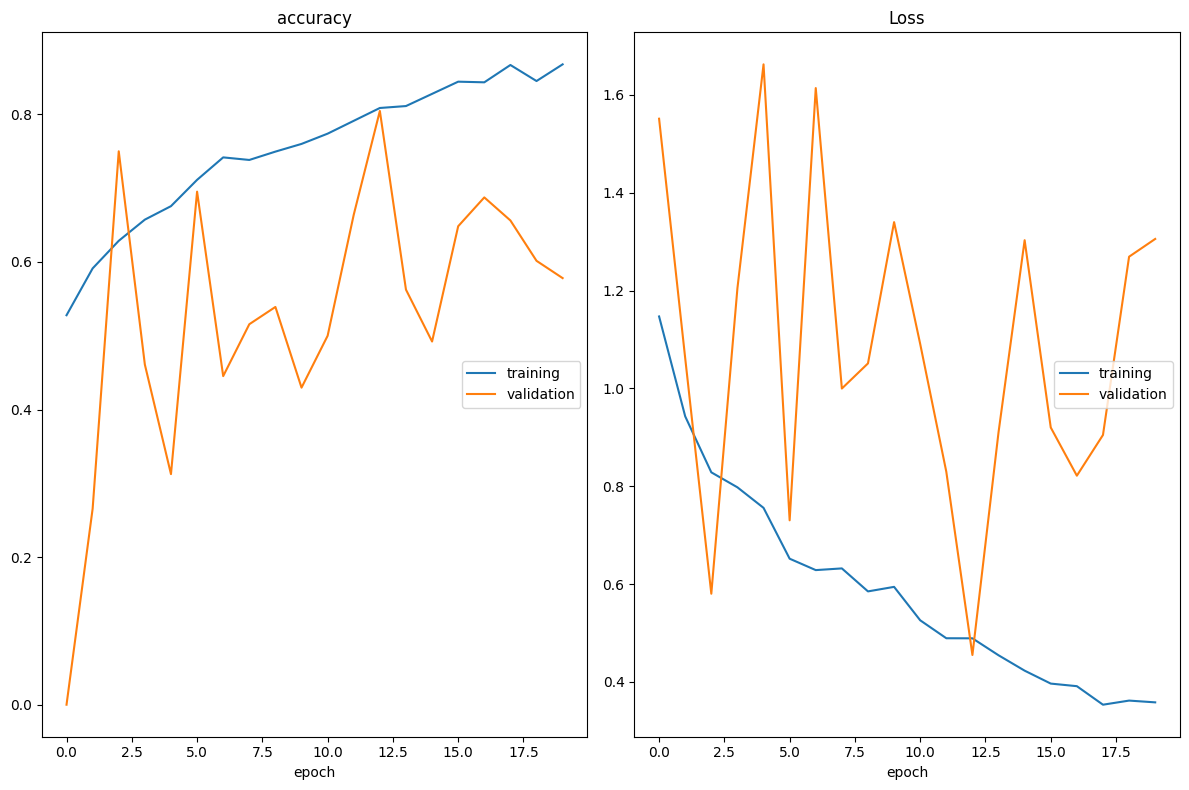

accuracy
	training         	 (min:    0.528, max:    0.868, cur:    0.868)
	validation       	 (min:    0.000, max:    0.805, cur:    0.578)
Loss
	training         	 (min:    0.354, max:    1.147, cur:    0.358)
	validation       	 (min:    0.455, max:    1.662, cur:    1.306)

Epoch 20: saving model to AudioF
115/115 [==============================] - 38s 330ms/step - loss: 0.3583 - accuracy: 0.8678 - val_loss: 1.3055 - val_accuracy: 0.5781 - lr: 5.0000e-04


In [50]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=20,batch_size=10,shuffle=True,callbacks=callbacks)


In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)

40/40 [==============================] - 10s 240ms/step - loss: 11.7176 - accuracy: 0.0156


In [52]:
y_pred = model.predict(X_test)

y_pred

40/40 [==============================] - 11s 251ms/step


array([[1.06536638e-04, 4.94185188e-05, 3.10541362e-01, ...,
        3.65646338e-05, 1.19947558e-02, 1.22671700e-04],
       [1.69491017e-04, 6.87500287e-05, 9.04093504e-01, ...,
        3.48162721e-05, 2.93952003e-02, 2.03306205e-04],
       [2.61547598e-07, 1.30630653e-07, 5.51228046e-01, ...,
        3.29920025e-09, 4.48751450e-01, 7.48835021e-08],
       ...,
       [1.49706475e-05, 2.02855108e-06, 1.22789115e-01, ...,
        7.45673844e-07, 3.79328209e-04, 2.07329176e-05],
       [4.87939455e-04, 1.49912143e-04, 6.21570408e-01, ...,
        1.07438036e-05, 2.25893840e-01, 2.13057850e-04],
       [8.92516346e-06, 5.13896066e-06, 9.90066290e-01, ...,
        1.34836853e-06, 6.73060399e-03, 4.28884923e-05]], dtype=float32)

In [53]:
lab=df['label'].unique()
lab

array(['Happy', 'Sad', 'Fear', 'Surprise', 'Neutral', 'Angry', 'Disgust'],
      dtype=object)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics




y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[  0   0 130 249   0  57   0]
 [  0   0  46 124   0  82   0]
 [  0   0  20   5   0   5   0]
 [  0   0   0   0   0   0   0]
 [  0   0  39  78   0 191   0]
 [  0   0   0   0   0   0   0]
 [  0   0  63 161   0  28   0]]


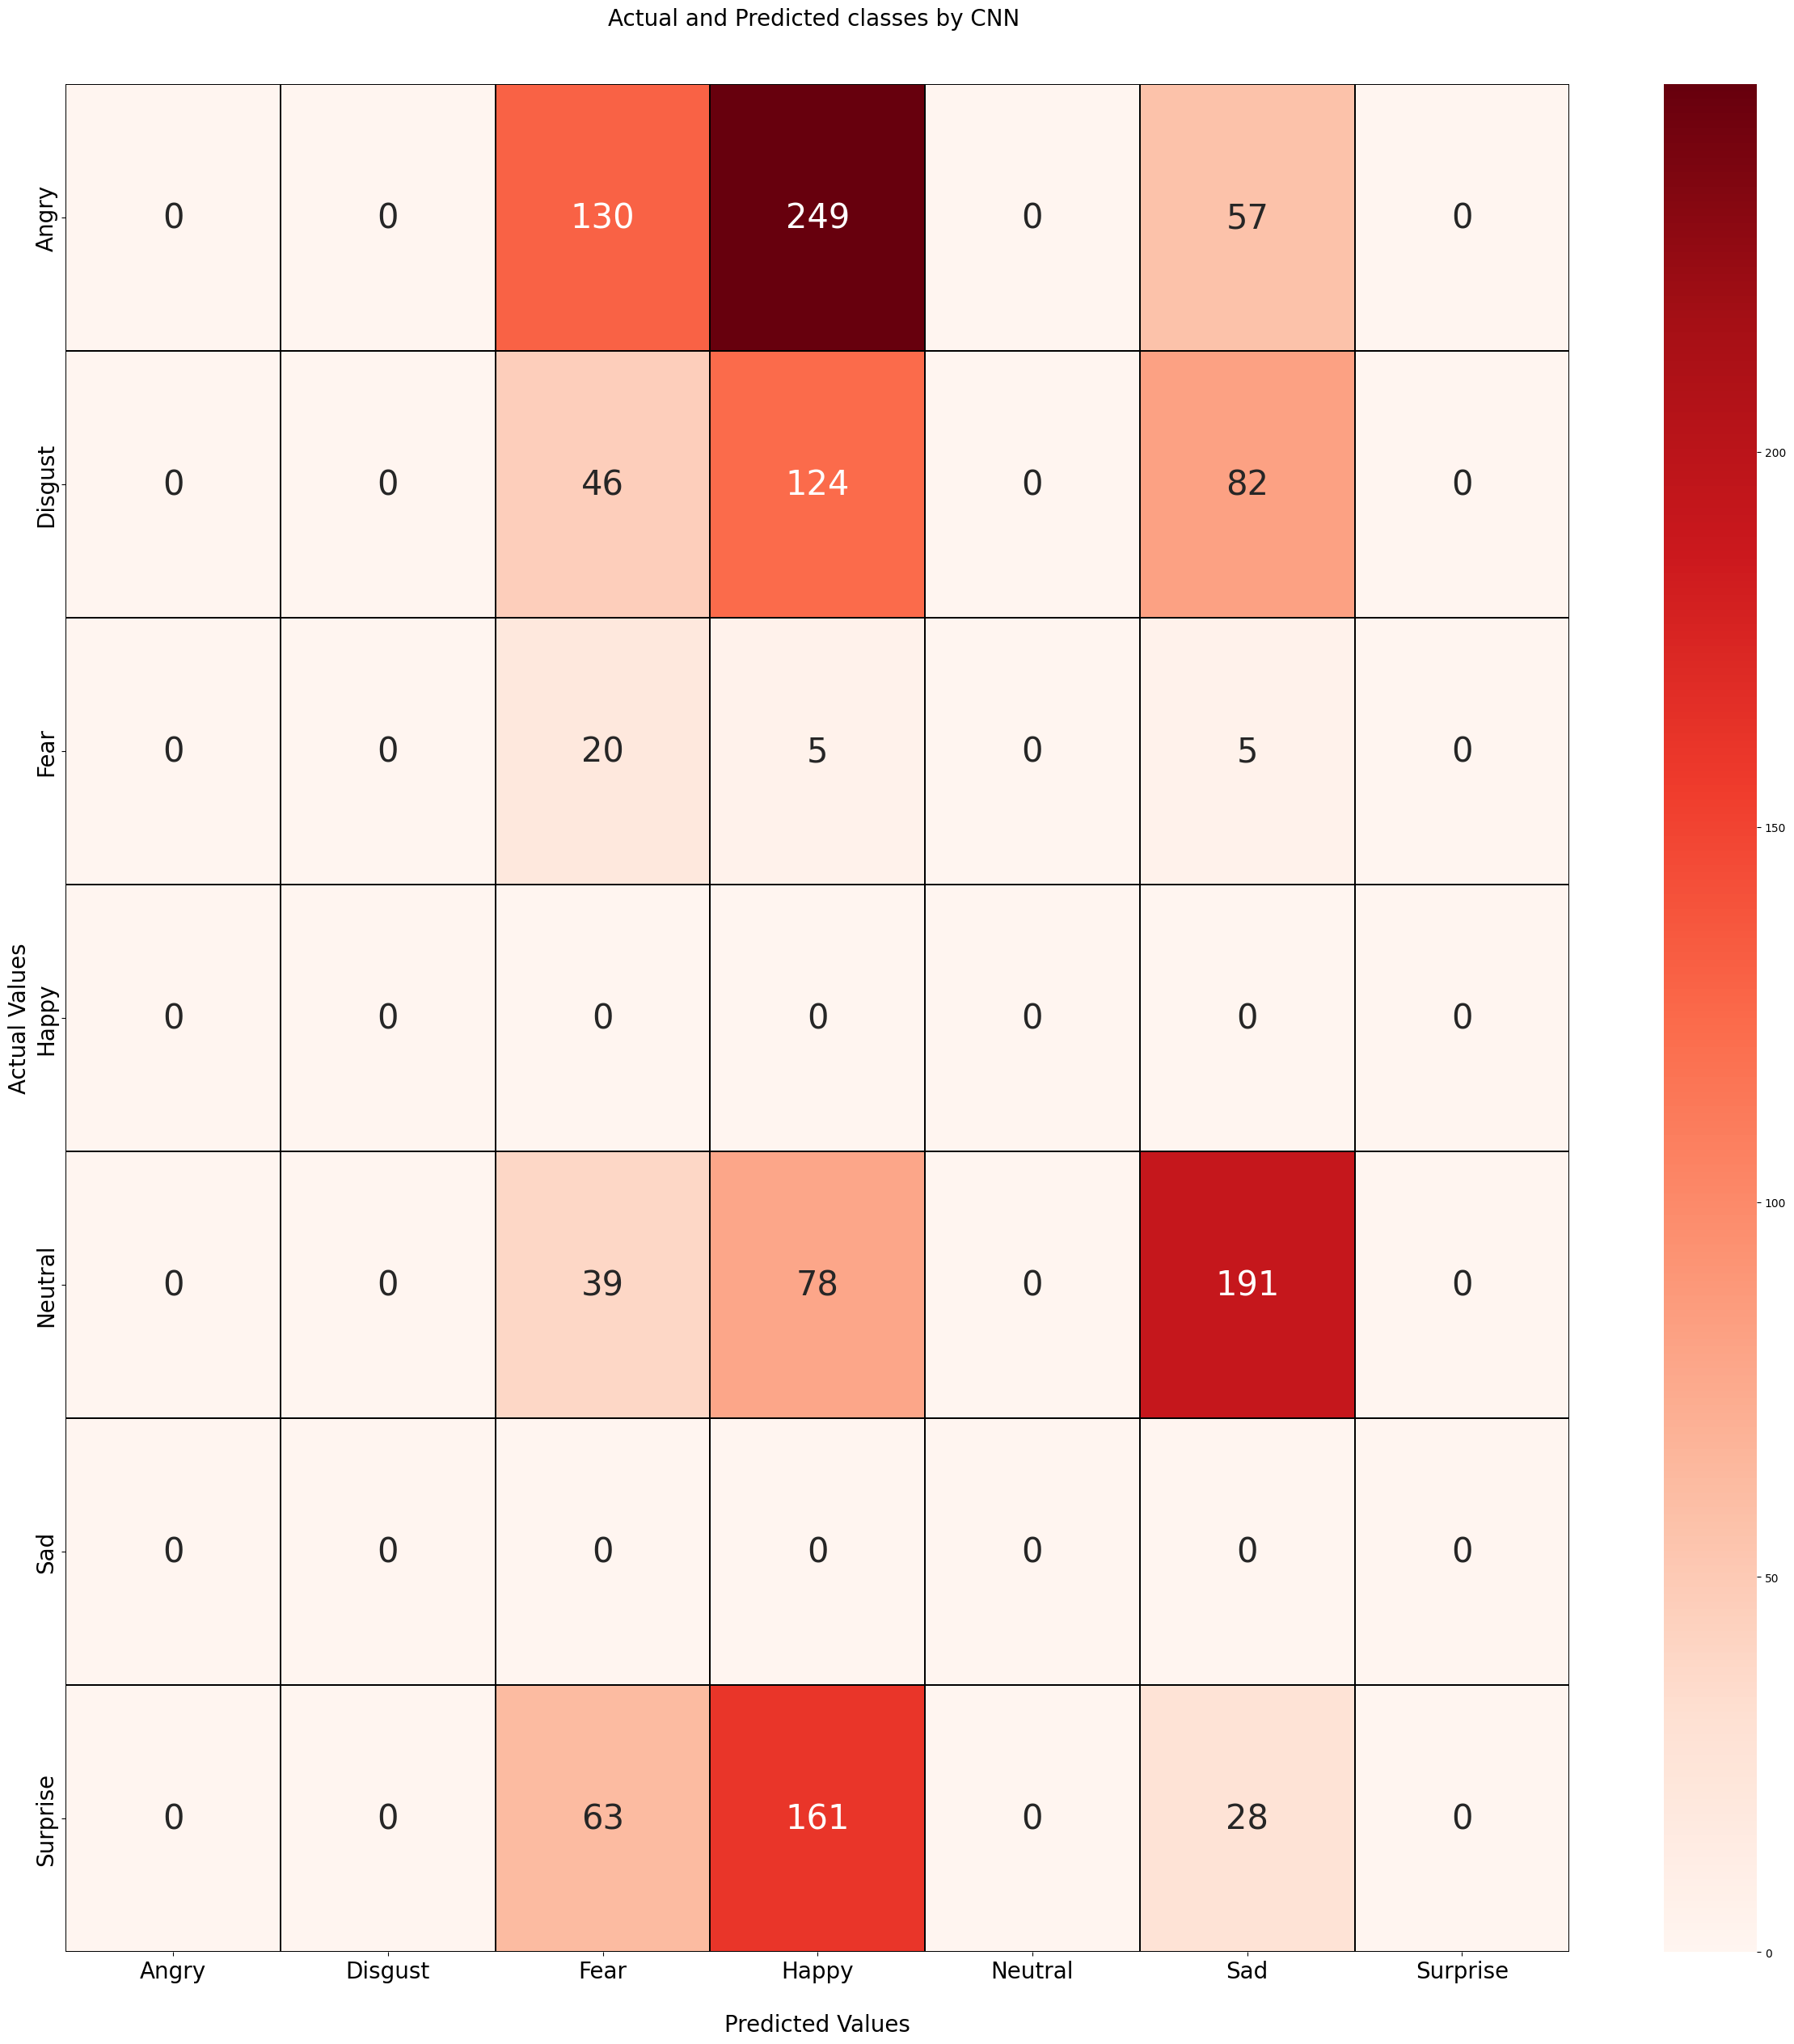

In [55]:

import seaborn as sns
f,ax = plt.subplots(1,1,figsize=(30,30))
ax = sns.heatmap(cm, annot=True, cmap='Reds',ax=ax,annot_kws={"size": 30}, fmt='g',linewidths=0.1, linecolor='black')

ax.set_title('Actual and Predicted classes by CNN \n\n',fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values',fontsize = 20);


ax.xaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']); ax.yaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']);
ax.tick_params(labelsize=20)
# ## Display the visualization of the Confusion Matrix.
# plt.show()


In [56]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,average = 'macro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))

0.01564945226917058
Precision Score :  0.009587727708533078
Recall Score :  0.09523809523809523
f1 Score :  0.017421602787456445


In [57]:
 pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import sklearn

y_pred_proba = tree.predict_proba(X_test)

NameError: name 'tree' is not defined

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Compute ROC curve and ROC area for each class

roc_auc_score(y_test,y_pred,multi_class = "ovr")


AxisError: axis 1 is out of bounds for array of dimension 1

In [60]:
import pandas as pd

df2 = pd.DataFrame([['Angry', 130,   7,   2,   5,   5,   3,   2], ['Disgust',  9, 108,   1,  10,   0,   2,   0], ['Fear',  7 ,  3,  95,   4,   8,   4,   0],
                   ['Happy', 5,   2,   2, 112,   3,   4,   7],['Neutral', 2,   1,   6,   2, 146,   6,   6],['Sad',3,   4,   3,   3,   0, 134,   2],['Surprise',11,  10,   3,  11,   7,   5,  90]],
                  columns=['Predictedclasses','Angry', 'Disgust', 'Fear', 'Happy', 'Neutral','sad','Surprise'])


# index=df2.index
# for i in index:
#     print(i)
 

<AxesSubplot: title={'center': 'Stacked Bar Graph of predicted count of each classes'}, xlabel='Predictedclasses'>

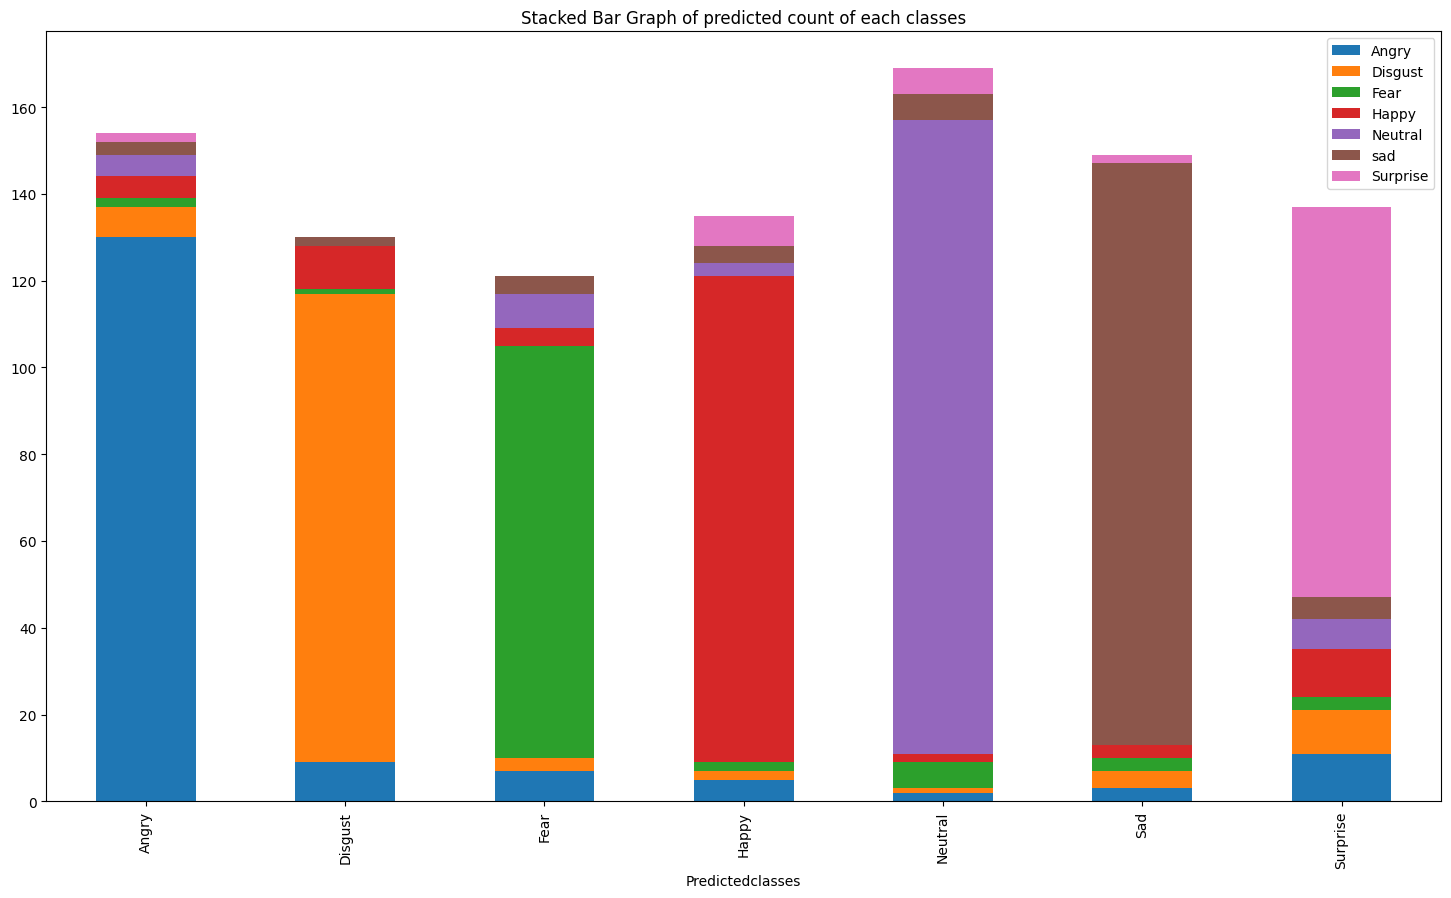

In [61]:
import matplotlib.pyplot as plt



df2.plot(x='Predictedclasses', kind='bar', stacked=True,
        title='Stacked Bar Graph of predicted count of each classes',figsize=(18,10))


In [62]:
# #Serialize the model and save
# import joblib
# joblib.dump(model, 'mixcnn.pkl')
# print("CNN Model Saved")
# #Load the model
# lr = joblib.load('mixcnn.pkl')
# # Save features from training
# rnd_columns = list(X.columns)
# joblib.dump(rnd_columns, 'rnd_columns.pkl')
# print("Random Forest Model Colums Saved")

In [63]:
from keras.models import Sequential
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1),activation='tanh',recurrent_activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",go_backwards=True,dropout=0.8,
    recurrent_dropout=0.6,),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])


checkpoint = ModelCheckpoint("Audio.h5",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.1,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 512)               63488     
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)              

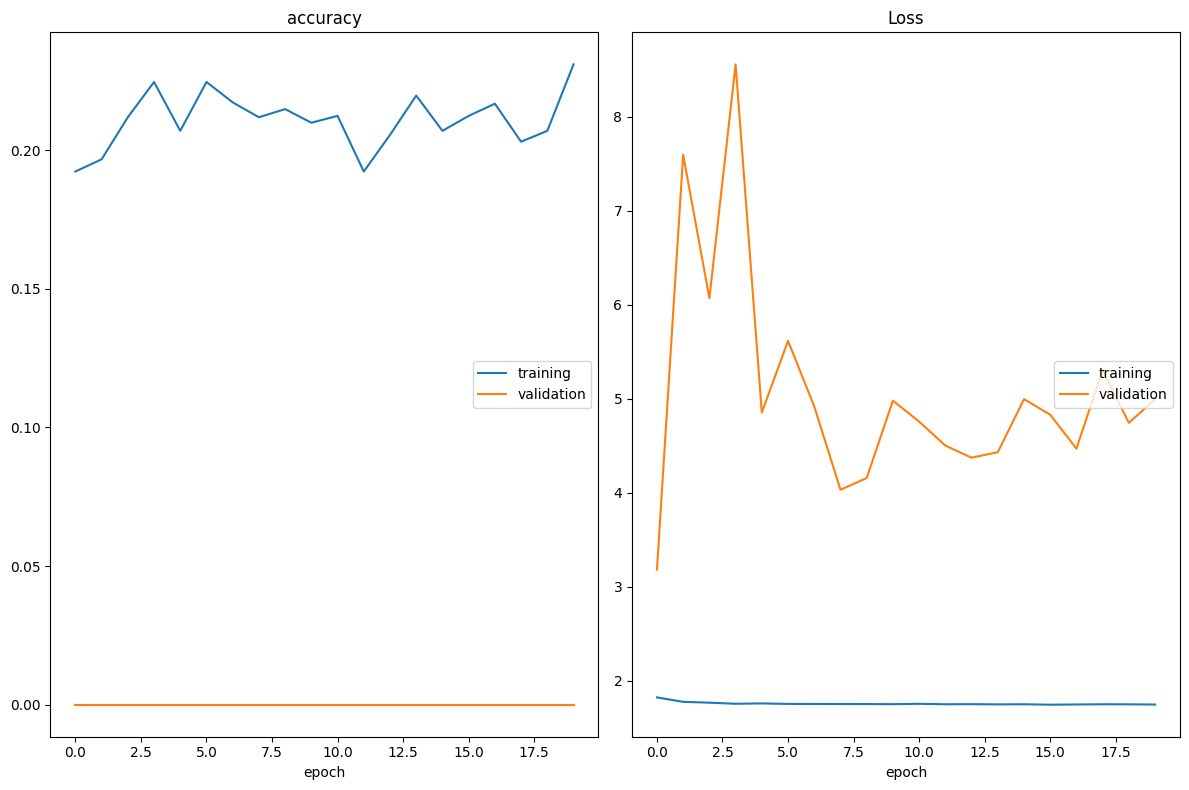

accuracy
	training         	 (min:    0.192, max:    0.231, cur:    0.231)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.744, max:    1.822, cur:    1.746)
	validation       	 (min:    3.182, max:    8.559, cur:    4.994)

Epoch 20: saving model to Audio.h5
205/205 [==============================] - 16s 78ms/step - loss: 1.7460 - accuracy: 0.2309 - val_loss: 4.9945 - val_accuracy: 0.0000e+00 - lr: 0.0010


In [64]:
history=model.fit(X,y,validation_split=0.2,epochs=20,batch_size=10,shuffle=True,callbacks=callbacks)

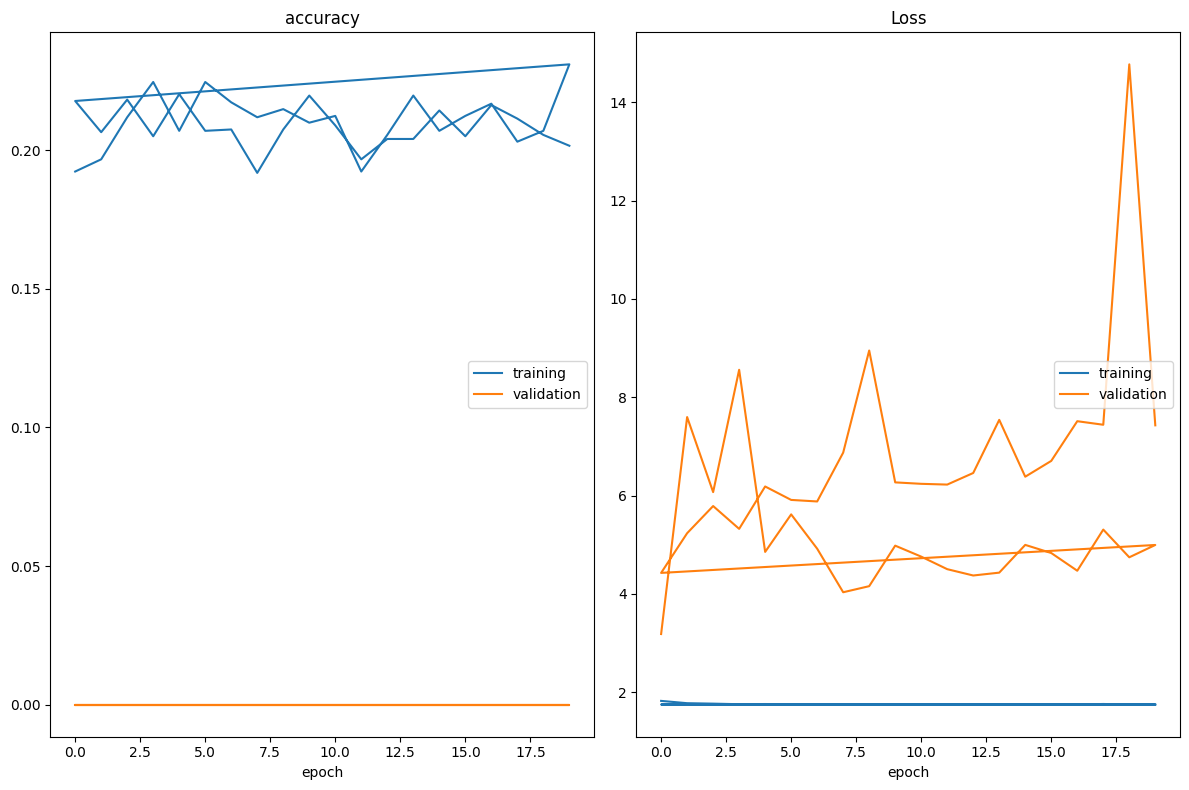

accuracy
	training         	 (min:    0.192, max:    0.231, cur:    0.202)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.744, max:    1.822, cur:    1.747)
	validation       	 (min:    3.182, max:   14.773, cur:    7.428)

Epoch 20: saving model to Audio.h5
511/511 [==============================] - 33s 65ms/step - loss: 1.7470 - accuracy: 0.2016 - val_loss: 7.4285 - val_accuracy: 0.0000e+00 - lr: 0.0010


In [65]:
history=model.fit(X,y,validation_split=0.2,epochs=20,batch_size=4,shuffle=True,callbacks=callbacks)

In [66]:
y_pred = model.predict(X_test)

y_pred

40/40 [==============================] - 2s 23ms/step


array([[8.41871575e-02, 1.79558720e-06, 2.21607596e-01, ...,
        1.45849347e-01, 2.10659310e-01, 1.22453704e-01],
       [8.52075666e-02, 2.99337876e-06, 2.20575571e-01, ...,
        1.46812081e-01, 2.10304022e-01, 1.22657001e-01],
       [8.64365473e-02, 4.12584222e-06, 2.19030440e-01, ...,
        1.48262978e-01, 2.08820507e-01, 1.24107599e-01],
       ...,
       [8.52569640e-02, 3.01905652e-06, 2.20395714e-01, ...,
        1.47726223e-01, 2.09333092e-01, 1.22967072e-01],
       [9.27865133e-02, 6.67934773e-06, 2.20815837e-01, ...,
        1.52207822e-01, 1.98822021e-01, 1.28508359e-01],
       [8.32729265e-02, 1.41327087e-06, 2.21665174e-01, ...,
        1.46732554e-01, 2.12285221e-01, 1.19867124e-01]], dtype=float32)

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics



y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



40/40 [==============================] - 1s 23ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

<AxesSubplot: >

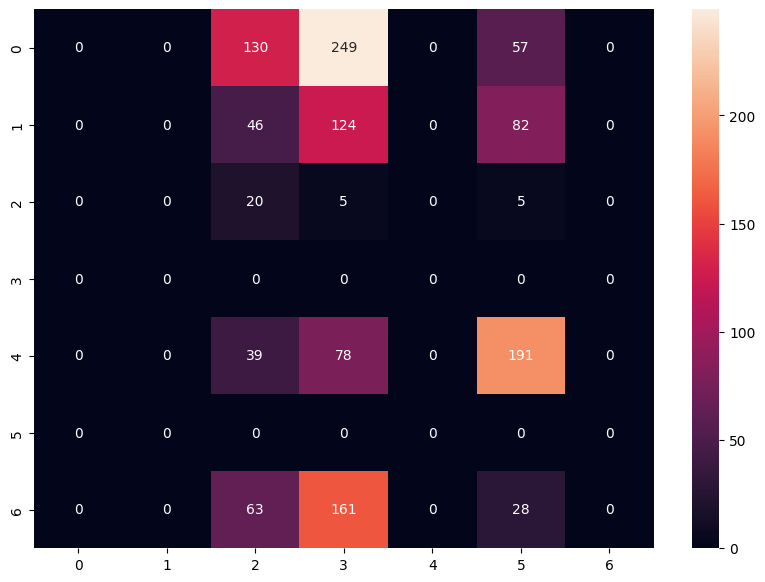

In [68]:
df_cm = pd.DataFrame(cm, index = (0, 1,2,3,4,5,6), columns = (0, 1,2,3,4,5,6))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [69]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

0.023474178403755867
Precision Score :  0.023474178403755867
Recall Score :  0.023474178403755867
f1 Score :  0.023474178403755867
